In [1]:
from mighty.utils.data import DataLoader, TransformDefault
import sklearn.decomposition
from torchvision.datasets import CIFAR10
import torch
import torch.nn as nn
import os.path as osp
import utils
from mighty.utils.signal import to_onehot
import matplotlib.pyplot as plt

In [2]:
BATCH_SIZE = 128

In [3]:
def pca_incremental(verbosity=1):
        """
        Memory efficient Incremental PCA performs the transformation batch-wise

        Returns
        -------
        pca: sklearn.decomposition.IncrementalPCA
            Trained PCA model.
        """
        pca_size=100
        data_loader = DataLoader(CIFAR10, transform=TransformDefault.cifar10(),
                             eval_size=1024)
        pca = sklearn.decomposition.IncrementalPCA(n_components=pca_size,
                                                   copy=False,
                                                   batch_size=BATCH_SIZE)
        description = "MutualInfo: Applying PCA to input data. Stage 1" \
            if verbosity >= 1 else None
        for images, _ in data_loader.eval(description):
            if images.shape[0] < pca_size:
                # drop the last batch if it's smaller
                continue
            images = images.flatten(start_dim=1)
            pca.partial_fit(images)
        return pca

In [4]:
def mi_mine(T_size=400,L_size=400):
    model_D6 = utils.VGG_IB(config='D6', mag=9, batch_norm=True, threshold=0, 
                init_var=0.01, sample_in_training=True, sample_in_testing=False, n_cls=10, no_ib=False)
    net=model_D6
    state_dict = torch.load(osp.expanduser("trained_vib/last_epoch_07312023_1137am.pth"), map_location=torch.device('cpu'))
    net.load_state_dict(state_dict['state_dict'])
    data_loader = DataLoader(CIFAR10, transform=TransformDefault.cifar10(),
                             eval_size=1024)
    pca_size=100
    inputs = []
    targets = []
    pca_incre=pca_incremental(1)
    for images, labels in data_loader.eval():
        images = images.flatten(start_dim=1)
        images_transformed = pca_incre.transform(images)
        images_transformed = torch.from_numpy(images_transformed).float()
        inputs.append(images_transformed)
        targets.append(labels)
    quantized={}
    quantized['target'] = torch.cat(targets, dim=0)
    quantized['input'] = torch.cat(inputs, dim=0)
    quantized['target'] = to_onehot(quantized['target']).type(torch.float32)
    activation = {}
    def getActivation(name):
     # the hook signature
      def hook(net, input, output):
        activation[name] = output.detach()
      return hook
     # register forward hooks on the layers of choice
    h1 = net.conv_layers[3].register_forward_hook(getActivation('information_1'))
    h2 = net.conv_layers[7].register_forward_hook(getActivation('information_2'))
    h3 = net.conv_layers[12].register_forward_hook(getActivation('information_3'))
    h4 = net.conv_layers[16].register_forward_hook(getActivation('information_4'))
    h5 = net.conv_layers[21].register_forward_hook(getActivation('information_5'))
    h6 = net.conv_layers[25].register_forward_hook(getActivation('information_6'))
    h7 = net.conv_layers[29].register_forward_hook(getActivation('information_7'))
    h8 = net.conv_layers[34].register_forward_hook(getActivation('information_8'))
    h9 = net.conv_layers[38].register_forward_hook(getActivation('information_9'))
    h10 = net.conv_layers[42].register_forward_hook(getActivation('information_10'))
    h11 = net.conv_layers[47].register_forward_hook(getActivation('information_11'))
    h12 = net.conv_layers[51].register_forward_hook(getActivation('information_12'))
    h13 = net.conv_layers[55].register_forward_hook(getActivation('information_13'))
    h14 = net.fc_layers[2].register_forward_hook(getActivation('information_14'))

    information_1_list= []
    information_2_list= []
    information_3_list= []
    information_4_list= []
    information_5_list= []
    information_6_list= []
    information_7_list= []
    information_8_list= []
    information_9_list= []
    information_10_list= []
    information_11_list= []
    information_12_list= []
    information_13_list= []
    information_14_list= []
    
    for images, labels in data_loader.eval():
        out = net(images)
        information_1_list.append(activation['information_1'])
        information_2_list.append(activation['information_2'])
        information_3_list.append(activation['information_3'])
        information_4_list.append(activation['information_4'])
        information_5_list.append(activation['information_5'])
        information_6_list.append(activation['information_6'])
        information_7_list.append(activation['information_7'])
        information_8_list.append(activation['information_8'])
        information_9_list.append(activation['information_9'])
        information_10_list.append(activation['information_10'])
        information_11_list.append(activation['information_11'])
        information_12_list.append(activation['information_12'])
        information_13_list.append(activation['information_13'])
        information_14_list.append(activation['information_14'])
    # detach the hooks
    h1.remove()
    h2.remove()
    h3.remove()
    h4.remove()
    h5.remove()
    h6.remove()
    h7.remove()
    h8.remove()
    h9.remove()
    h10.remove()
    h11.remove()
    h12.remove()
    h13.remove()
    h14.remove()
    
    flatten_information_1=[]
    flatten_information_2=[]
    flatten_information_3=[]
    flatten_information_4=[]
    flatten_information_5=[]
    flatten_information_6=[]
    flatten_information_7=[]
    flatten_information_8=[]
    flatten_information_9=[]
    flatten_information_10=[]
    flatten_information_11=[]
    flatten_information_12=[]
    flatten_information_13=[]
    flatten_information_14=[]

    for i in range(len(information_1_list)):
        flatten_information_1.append(information_1_list[i].flatten(start_dim=1))
        flatten_information_2.append(information_2_list[i].flatten(start_dim=1))
        flatten_information_3.append(information_3_list[i].flatten(start_dim=1))
        flatten_information_4.append(information_4_list[i].flatten(start_dim=1))
        flatten_information_5.append(information_5_list[i].flatten(start_dim=1))
        flatten_information_6.append(information_6_list[i].flatten(start_dim=1))
        flatten_information_7.append(information_7_list[i].flatten(start_dim=1))
        flatten_information_8.append(information_8_list[i].flatten(start_dim=1))
        flatten_information_9.append(information_9_list[i].flatten(start_dim=1))
        flatten_information_10.append(information_10_list[i].flatten(start_dim=1))
        flatten_information_11.append(information_11_list[i].flatten(start_dim=1))
        flatten_information_12.append(information_12_list[i].flatten(start_dim=1))
        flatten_information_13.append(information_13_list[i].flatten(start_dim=1))
        flatten_information_14.append(information_14_list[i].flatten(start_dim=1))
    
    activations_1=torch.cat(flatten_information_1,dim=0).numpy()
    activations_2=torch.cat(flatten_information_2,dim=0).numpy()
    activations_3=torch.cat(flatten_information_3,dim=0).numpy()
    activations_4=torch.cat(flatten_information_4,dim=0).numpy()
    activations_5=torch.cat(flatten_information_5,dim=0).numpy()
    activations_6=torch.cat(flatten_information_6,dim=0).numpy()
    activations_7=torch.cat(flatten_information_7,dim=0).numpy()
    activations_8=torch.cat(flatten_information_8,dim=0).numpy()
    activations_9=torch.cat(flatten_information_9,dim=0).numpy()
    activations_10=torch.cat(flatten_information_10,dim=0).numpy()
    activations_11=torch.cat(flatten_information_11,dim=0).numpy()
    activations_12=torch.cat(flatten_information_12,dim=0).numpy()
    activations_13=torch.cat(flatten_information_13,dim=0).numpy()
    activations_14=torch.cat(flatten_information_14,dim=0).numpy()
    
    pca_100 = sklearn.decomposition.PCA(n_components=pca_size)
    
    activations_1 = pca_100.fit_transform(activations_1)
    activations_2 = pca_100.fit_transform(activations_2)
    activations_3 = pca_100.fit_transform(activations_3)
    activations_4 = pca_100.fit_transform(activations_4)
    activations_5 = pca_100.fit_transform(activations_5)
    activations_6 = pca_100.fit_transform(activations_6)
    activations_7 = pca_100.fit_transform(activations_7)
    activations_8 = pca_100.fit_transform(activations_8)
    activations_9 = pca_100.fit_transform(activations_9)
    activations_10 = pca_100.fit_transform(activations_10)
    activations_11 = pca_100.fit_transform(activations_11)
    activations_12 = pca_100.fit_transform(activations_12)
    activations_13 = pca_100.fit_transform(activations_13)
    activations_14 = pca_100.fit_transform(activations_14)
    
    input_size=quantized['input'].shape[1]
    activation_size=activations_14.shape[1]
    target_size=quantized['target'].shape[1]
    
    
    statistics_network_target = nn.Sequential(nn.Linear(activation_size+target_size, T_size),
                                    nn.ReLU(),
                                    nn.Linear(T_size, T_size),
                                    nn.ReLU(),
                                    nn.Linear(T_size, T_size),
                                    nn.ReLU(),
                                    nn.Linear(T_size, 1))
    mine_target = utils.Mine(
        T = statistics_network_target,
        #loss = 'mine', #mine_biased, fdiv
        loss = 'mine', #mine_biased, fdiv
        method = 'concat'
    )
    
    info_y_1=mine_target.optimize(activations_1,quantized['target'],batch_size=100, iters = 100)
    info_y_2=mine_target.optimize(activations_2,quantized['target'],batch_size=100, iters = 100)
    info_y_3=mine_target.optimize(activations_3,quantized['target'],batch_size=100, iters = 100)
    info_y_4=mine_target.optimize(activations_4,quantized['target'],batch_size=100, iters = 100)
    info_y_5=mine_target.optimize(activations_5,quantized['target'],batch_size=100, iters = 100)
    info_y_6=mine_target.optimize(activations_6,quantized['target'],batch_size=100, iters = 100)
    info_y_7=mine_target.optimize(activations_7,quantized['target'],batch_size=100, iters = 100)
    info_y_8=mine_target.optimize(activations_8,quantized['target'],batch_size=100, iters = 100)
    info_y_9=mine_target.optimize(activations_9,quantized['target'],batch_size=100, iters = 100)
    info_y_10=mine_target.optimize(activations_10,quantized['target'],batch_size=100, iters = 100)
    info_y_11=mine_target.optimize(activations_11,quantized['target'],batch_size=100, iters = 100)
    info_y_12=mine_target.optimize(activations_12,quantized['target'],batch_size=100, iters = 100)
    info_y_13=mine_target.optimize(activations_13,quantized['target'],batch_size=100, iters = 100)
    info_y_14=mine_target.optimize(activations_14,quantized['target'],batch_size=100, iters = 100)
    
    
    info_y=[]
    info_y.append(info_y_1)
    info_y.append(info_y_2)
    info_y.append(info_y_3)
    info_y.append(info_y_4)
    info_y.append(info_y_5)
    info_y.append(info_y_6)
    info_y.append(info_y_7)
    info_y.append(info_y_8)
    info_y.append(info_y_9)
    info_y.append(info_y_10)
    info_y.append(info_y_11)
    info_y.append(info_y_12)
    info_y.append(info_y_13)
    info_y.append(info_y_14)
    
    
    statistics_network_L_1 = nn.Sequential(nn.Linear(input_size+activation_size, L_size),
                                    nn.ReLU(),
                                    nn.Linear(L_size, L_size),
                                    nn.ReLU(),
                                    nn.Linear(L_size, L_size),
                                    nn.ReLU(),
                                    nn.Linear(L_size, 1))
    mine_L_1 = utils.Mine(
        T = statistics_network_L_1,
        #loss = 'mine', #mine_biased, fdiv
        loss = 'fdiv', #mine_biased, fdiv
        method = 'concat'
    )
    
    statistics_network_L_2 = nn.Sequential(nn.Linear(activation_size+activation_size, L_size),
                                    nn.ReLU(),
                                    nn.Linear(L_size, L_size),
                                    nn.ReLU(),
                                    nn.Linear(L_size, L_size),
                                    nn.ReLU(),
                                    nn.Linear(L_size, 1))
    mine_L_2 = utils.Mine(
        T = statistics_network_L_2,
        #loss = 'mine', #mine_biased, fdiv
        loss = 'fdiv', #mine_biased, fdiv
        method = 'concat'
    )
    
    info_L_1=mine_L_1.optimize(quantized['input'],activations_14,batch_size=100, iters = 100)
    info_L_2=mine_L_2.optimize(activations_1,activations_14,batch_size=100, iters = 100)
    info_L_3=mine_L_2.optimize(activations_2,activations_14,batch_size=100, iters = 100)
    info_L_4=mine_L_2.optimize(activations_3,activations_14,batch_size=100, iters = 100)
    info_L_5=mine_L_2.optimize(activations_4,activations_14,batch_size=100, iters = 100)
    info_L_6=mine_L_2.optimize(activations_5,activations_14,batch_size=100, iters = 100)
    info_L_7=mine_L_2.optimize(activations_6,activations_14,batch_size=100, iters = 100)
    info_L_8=mine_L_2.optimize(activations_7,activations_14,batch_size=100, iters = 100)
    info_L_9=mine_L_2.optimize(activations_8,activations_14,batch_size=100, iters = 100)
    info_L_10=mine_L_2.optimize(activations_9,activations_14,batch_size=100, iters = 100)
    info_L_11=mine_L_2.optimize(activations_10,activations_14,batch_size=100, iters = 100)
    info_L_12=mine_L_2.optimize(activations_11,activations_14,batch_size=100, iters = 100)
    info_L_13=mine_L_2.optimize(activations_12,activations_14,batch_size=100, iters = 100)
    info_L_14=mine_L_2.optimize(activations_13,activations_14,batch_size=100, iters = 100)
    
    info_L=[]
    info_L.append(info_L_1)
    info_L.append(info_L_2)
    info_L.append(info_L_3)
    info_L.append(info_L_4)
    info_L.append(info_L_5)
    info_L.append(info_L_6)
    info_L.append(info_L_7)
    info_L.append(info_L_8)
    info_L.append(info_L_9)
    info_L.append(info_L_10)
    info_L.append(info_L_11)
    info_L.append(info_L_12)
    info_L.append(info_L_13)
    info_L.append(info_L_14)
   
    return info_y,info_L

In [5]:
mi_data=mi_mine()

Using structure [(64, 0.03125), (64, 0.03125), 'M', (128, 0.0625), (128, 0.0625), 'M', (256, 0.125), (256, 0.125), (256, 0.125), 'M', (512, 0.25), (512, 0.25), (512, 0.25), 'M', (512, 0.5), (512, 0.5), (512, 0.5), 'M']
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


Files already downloaded and verified
Files already downloaded and verified


In [6]:
info_y=[]
info_L=[]
for i in range(len(mi_data[0])):
    info_y.append(mi_data[0][i])
    info_L.append(mi_data[1][i])

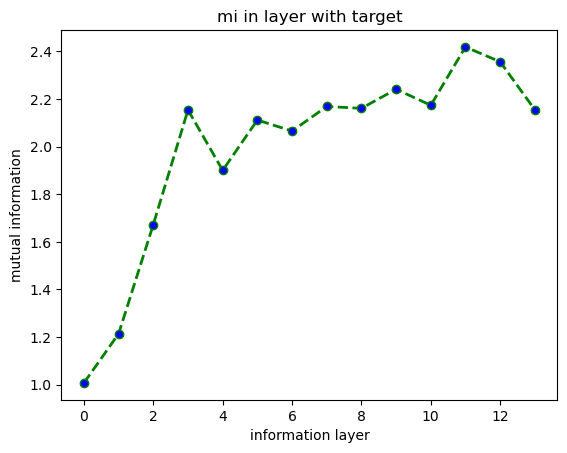

In [7]:
plt.plot(info_y, color='green', linestyle='dashed', linewidth = 2,marker='o', markerfacecolor='blue', markersize=6)
plt.xlabel('information layer')
plt.ylabel('mutual information')
plt.title('mi in layer with target')
#plt.legend()
plt.show()

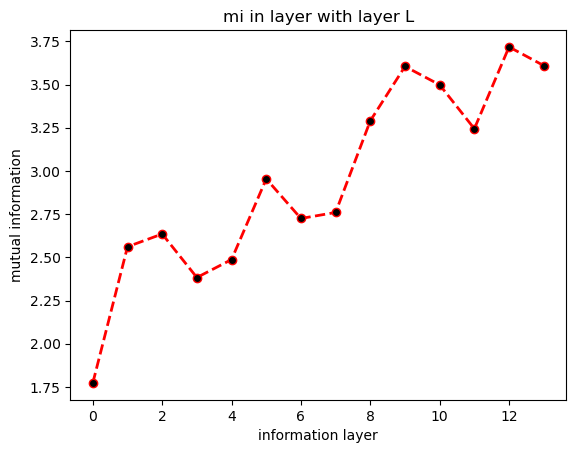

In [8]:
plt.plot(info_L, color='red', linestyle='dashed', linewidth = 2,marker='o', markerfacecolor='black', markersize=6)
plt.xlabel('information layer')
plt.ylabel('mutual information')
plt.title('mi in layer with layer L')
#plt.legend()
plt.show()